In [1]:
import pandas as pd
import numpy as np
import sys
import os
sys.path.append(os.path.abspath(".."))
df = pd.read_csv('../../Datas/iM_data.csv', encoding='cp949')
from module.MyEncoder import MyRangeEncoder

In [2]:
filter_col = '업종_대분류	업종_중분류	사업장_시도	사업장_시군구	법인_고객등급	전담고객여부'.split()
filter_col

['업종_대분류', '업종_중분류', '사업장_시도', '사업장_시군구', '법인_고객등급', '전담고객여부']

In [3]:
filtered_df = df.drop(columns=filter_col, axis=1)

In [4]:
e = MyRangeEncoder(mode = 'mean')

In [5]:
e_f_df = e.fit_transform(filtered_df)

In [6]:
e_f_df[filter_col] = df[filter_col]

In [7]:
e_f_df

,기준년월,요구불예금잔액,거치식예금잔액,적립식예금잔액,수익증권잔액,신탁잔액,퇴직연금잔액,여신한도금액,여신_운전자금대출잔액,여신_시설자금대출잔액,...,스마트뱅킹거래건수,폰뱅킹거래건수,ATM거래건수,자동이체거래건수,업종_대분류,업종_중분류,사업장_시도,사업장_시군구,법인_고객등급,전담고객여부
0,202201,250.00,0.0,0.0,0.0,0.0,0.0,2000.0,0.0,0.0,...,0.0,0.0,0.0,45.5,제조업,기타 기계 및 장비 제조업,대구광역시,서구,최우수,Y
1,202201,90.00,0.0,0.0,0.0,220.0,220.0,0.0,1300.0,45.0,...,1.0,0.0,4.0,35.5,제조업,섬유제품 제조업; 의복제외,대구광역시,서구,최우수,Y
2,202201,0.11,0.0,0.0,0.0,0.0,0.0,100.0,93.0,0.0,...,2.0,0.0,0.0,8.0,부동산업,부동산업,대구광역시,북구,일반,N
3,202201,7.80,0.0,80.0,0.0,0.0,0.0,500.0,0.0,0.0,...,4.0,4.0,4.0,8.0,도매 및 소매업,도매 및 상품 중개업,대구광역시,서구,우수,Y
4,202201,7.10,0.0,0.0,0.0,0.0,0.0,0.0,320.0,0.0,...,1.0,0.0,0.0,35.5,운수 및 창고업,육상운송 및 파이프라인 운송업,경상북도,경주시,우수,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347294,202412,0.12,0.0,0.0,0.0,0.0,0.0,0.0,43.0,0.0,...,0.0,0.0,0.0,15.5,건설업,전문직별 공사업,경상북도,청도군,일반,N
347295,202412,76.00,0.0,0.0,0.0,0.0,0.0,0.0,540.0,0.0,...,0.0,0.0,0.0,25.5,건설업,전문직별 공사업,경상북도,청도군,우수,Y
347296,202412,1.10,0.0,0.0,0.0,0.0,0.0,0.0,14.0,140.0,...,0.0,0.0,0.0,8.0,"사업시설 관리, 사업 지원 및 임대 서비스업",사업지원 서비스업,경상북도,청도군,일반,Y
347297,202412,12.00,0.0,0.0,0.0,0.0,0.0,0.0,23.0,0.0,...,0.0,0.0,0.0,15.5,"농업, 임업 및 어업",농업,경상북도,청도군,일반,N


In [8]:
grouped_df = e_f_df.groupby('사업장_시도').sum()

In [9]:
num_col = grouped_df.select_dtypes(exclude= 'object').columns

In [10]:
num_col

Index(['기준년월', '요구불예금잔액', '거치식예금잔액', '적립식예금잔액', '수익증권잔액', '신탁잔액', '퇴직연금잔액',
       '여신한도금액', '여신_운전자금대출잔액', '여신_시설자금대출잔액', '외환_수출실적금액', '외환_수입실적금액',
       '신용카드사용금액', '체크카드사용금액', '창구거래금액', '인터넷뱅킹거래금액', '스마트뱅킹거래금액', '폰뱅킹거래금액',
       'ATM거래금액', '자동이체금액', '요구불입금금액', '요구불출금금액', '요구불예금좌수', '거치식예금좌수',
       '적립식예금좌수', '수익증권좌수', '신탁좌수', '퇴직연금좌수', '여신_운전자금대출좌수', '여신_시설자금대출좌수',
       '신용카드개수', '외환_수출실적거래건수', '외환_수입실적거래건수', '창구거래건수', '인터넷뱅킹거래건수',
       '스마트뱅킹거래건수', '폰뱅킹거래건수', 'ATM거래건수', '자동이체거래건수'],
      dtype='object')

In [11]:
new_df = grouped_df[num_col].drop(columns='기준년월')

In [12]:
new_df


,요구불예금잔액,거치식예금잔액,적립식예금잔액,수익증권잔액,신탁잔액,퇴직연금잔액,여신한도금액,여신_운전자금대출잔액,여신_시설자금대출잔액,외환_수출실적금액,...,여신_시설자금대출좌수,신용카드개수,외환_수출실적거래건수,외환_수입실적거래건수,창구거래건수,인터넷뱅킹거래건수,스마트뱅킹거래건수,폰뱅킹거래건수,ATM거래건수,자동이체거래건수
사업장_시도,,,,,,,,,,,,,,,,,,,,,
경기도,722648.09,206364.0,39683.00,324.80,5569110.32,148478.87,5835105.0,15175491.93,9.118927e+06,106.31,...,5806.5,24535.0,656.0,1564.5,1278.0,60737.0,7168.0,27.0,10768.0,89847.5
경상남도,756919.95,388987.0,30832.90,1496.81,630060.96,276821.36,4569166.0,10519160.01,1.265776e+07,101.79,...,11008.0,41644.5,714.0,1372.5,3576.5,178501.0,19088.0,2195.0,11561.5,153910.0
경상북도,14100221.75,4632267.8,531618.52,67681.27,18308480.91,9167095.28,53018873.4,87071195.81,6.313186e+07,3163.85,...,88162.0,522485.0,19678.5,14890.5,186888.0,2643496.0,253719.0,55930.5,208493.0,2164487.0
광주광역시,626.84,0.0,0.00,0.00,0.00,0.00,96600.0,162770.80,1.192900e+06,0.00,...,128.0,28.0,0.0,0.0,0.0,205.5,20.0,0.0,6.0,514.0
대구광역시,20933899.92,10995331.3,504394.80,182494.71,16802613.37,10446708.84,81098442.2,96725431.06,1.156627e+08,737.86,...,97411.0,722175.0,11845.0,16562.5,365050.5,3657097.0,661592.5,123991.0,360563.0,2936277.0
대전광역시,144166.74,119765.0,1790.00,406.50,135422.00,5422.00,1577350.0,1340882.85,4.439910e+06,0.00,...,613.0,3763.5,0.0,2.0,372.0,10805.0,2144.5,128.5,534.5,16371.0
부산광역시,1539848.86,13210719.0,66934.60,24035.69,3362982.06,3174600.66,10165133.0,16247865.12,2.187679e+07,371.26,...,17245.5,62493.0,3718.5,3877.5,11813.5,229972.0,21522.0,4631.0,30580.5,234599.0
서울특별시,16373091.85,181769020.9,55169.70,7871.48,35013284.83,3680538.23,60852820.0,47498863.67,4.101601e+07,1122.23,...,7333.5,37862.5,6421.5,3973.0,15130.5,100329.5,9616.0,825.0,28398.5,136923.0
세종특별자치시,36116.28,70000.0,0.00,0.00,0.00,0.00,164800.0,168060.00,8.846000e+04,0.00,...,210.0,498.0,0.0,0.0,10.0,2075.0,13.0,0.0,28.0,1603.0


In [13]:
new_df.to_csv('iM지역별로 묶은거.csv')
new_df.to_excel('iM지역별로 묶은거.xlsx')

In [20]:
import matplotlib.pyplot as plt

In [24]:
new_df.columns

Index(['요구불예금잔액', '거치식예금잔액', '적립식예금잔액', '수익증권잔액', '신탁잔액', '퇴직연금잔액', '여신한도금액',
       '여신_운전자금대출잔액', '여신_시설자금대출잔액', '외환_수출실적금액', '외환_수입실적금액', '신용카드사용금액',
       '체크카드사용금액', '창구거래금액', '인터넷뱅킹거래금액', '스마트뱅킹거래금액', '폰뱅킹거래금액', 'ATM거래금액',
       '자동이체금액', '요구불입금금액', '요구불출금금액', '요구불예금좌수', '거치식예금좌수', '적립식예금좌수',
       '수익증권좌수', '신탁좌수', '퇴직연금좌수', '여신_운전자금대출좌수', '여신_시설자금대출좌수', '신용카드개수',
       '외환_수출실적거래건수', '외환_수입실적거래건수', '창구거래건수', '인터넷뱅킹거래건수', '스마트뱅킹거래건수',
       '폰뱅킹거래건수', 'ATM거래건수', '자동이체거래건수'],
      dtype='object')

In [27]:
plt.rcParams['font.family'] = 'AppleGothic'

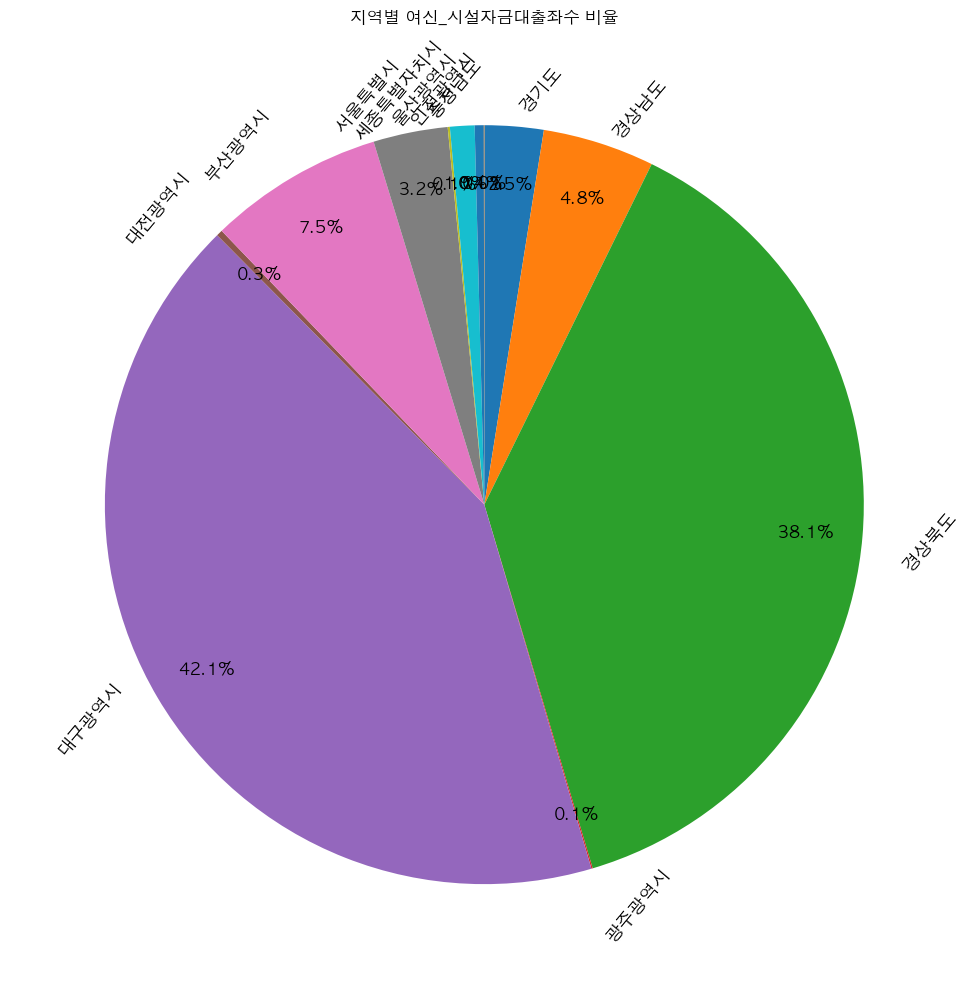

In [36]:
plt.figure(figsize=(10, 10))

wedges, texts, autotexts = plt.pie(
    x=new_df['여신_시설자금대출좌수'],
    labels=new_df.index,
    autopct='%1.1f%%',
    startangle=90,
    counterclock=False,
    pctdistance=0.85,
    labeldistance=1.1
)

# 라벨을 세로로 회전
for text in texts:
    text.set_fontsize(13)
    text.set_rotation(50)  # 글자를 세로로 회전

for autotext in autotexts:
    autotext.set_fontsize(12)

plt.title('지역별 여신_시설자금대출좌수 비율')
plt.tight_layout()
plt.show()